In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
from datetime import date, datetime, timedelta

In [2]:
df = pd.read_csv('member_sample.csv', index_col = 0)

In [3]:
df.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [4]:
df.City.value_counts().nlargest(15)

WARWICK             2815
CRANSTON            2742
PROVIDENCE          1690
NORTH PROVIDENCE     948
COVENTRY             778
JOHNSTON             703
EAST GREENWICH       641
PAWTUCKET            640
NORTH KINGSTOWN      637
WEST WARWICK         606
CUMBERLAND           560
NARRAGANSETT         531
WAKEFIELD            497
RIVERSIDE            436
LINCOLN              402
Name: City, dtype: int64

### Build a Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [6]:
pipe = Pipeline([('sscaler', StandardScaler()), ('ridge', Ridge())])

### Example of Creating a Class for Transformations

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

In [8]:
class TripleATransfrom(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y):
        return self
    def transform(self, X):
        return np.where(X == 'Y', 1, 0)

In [9]:
transformer = TripleATransfrom()

In [10]:
transformer.fit(df, df['Total Cost'])

TripleATransfrom()

In [11]:
df['FSV CMSI Flag'] = transformer.transform(df['FSV CMSI Flag'])

In [12]:
df['FSV CMSI Flag'].value_counts()

0    20393
1      951
Name: FSV CMSI Flag, dtype: int64

In [13]:
df['SC Vehicle Manufacturer Name'].value_counts().nlargest(15)


TOYOTA        2289
FORD          1580
HONDA         1494
CHEVROLET      935
NISSAN         780
HYUNDAI        630
BUICK          491
SUBARU         480
JEEP           468
DODGE          391
CHRYSLER       387
VOLKSWAGEN     357
VOLVO          340
LEXUS          325
MERCURY        278
Name: SC Vehicle Manufacturer Name, dtype: int64

### Focus on Costs

In [14]:
#Find columns that contains 'String' value
def print_cols(df, string):
    cols = [i for i in df.columns if string in i]
    return cols

In [15]:
cost_cols = print_cols(df, 'Cost')
cost_cols

['ERS Member Cost Year 1',
 'ERS Member Cost Year 2',
 'ERS Member Cost Year 3',
 'Basic Cost',
 'Plus Cost',
 'Premier Cost',
 'Total Cost']

In [16]:
cost_df = df[['Individual Key', 'Household Key', 'Call Status Recv Date', 'ERS Member Cost Year 1','ERS Member Cost Year 2','ERS Member Cost Year 3',
 'Basic Cost', 'Plus Cost','Premier Cost','Total Cost','Dispatch Code1 Description']]

In [17]:
cost_df.head()

,Individual Key,Household Key,Call Status Recv Date,ERS Member Cost Year 1,ERS Member Cost Year 2,ERS Member Cost Year 3,Basic Cost,Plus Cost,Premier Cost,Total Cost,Dispatch Code1 Description
0,10000003.0,10462590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,2017-04-13 10:05:17,0.0,0.0,65.0,32.5,0.0,0.0,32.5,Engine Overheat
2,52211550.0,4500791.0,2016-07-26 11:27:57,0.0,0.0,65.0,30.0,0.0,0.0,30.0,Member Requests Battery Service
3,52211550.0,4500791.0,2017-02-13 11:17:47,0.0,0.0,65.0,32.5,0.0,0.0,32.5,Member Requests Battery Service
4,52211550.0,4500791.0,2015-01-29 14:34:29,0.0,0.0,65.0,30.0,0.0,0.0,30.0,No Crank - Jump Start


In [18]:
cost_df[cost_df['Individual Key'] == 52211550.0]

,Individual Key,Household Key,Call Status Recv Date,ERS Member Cost Year 1,ERS Member Cost Year 2,ERS Member Cost Year 3,Basic Cost,Plus Cost,Premier Cost,Total Cost,Dispatch Code1 Description
1,52211550.0,4500791.0,2017-04-13 10:05:17,0.0,0.0,65.0,32.5,0.0,0.0,32.5,Engine Overheat
2,52211550.0,4500791.0,2016-07-26 11:27:57,0.0,0.0,65.0,30.0,0.0,0.0,30.0,Member Requests Battery Service
3,52211550.0,4500791.0,2017-02-13 11:17:47,0.0,0.0,65.0,32.5,0.0,0.0,32.5,Member Requests Battery Service
4,52211550.0,4500791.0,2015-01-29 14:34:29,0.0,0.0,65.0,30.0,0.0,0.0,30.0,No Crank - Jump Start
5,52211550.0,4500791.0,2015-09-25 16:26:14,0.0,0.0,65.0,53.0,0.0,0.0,53.0,Member Requests Battery Service
6,52211550.0,4500791.0,2016-04-05 11:33:08,0.0,0.0,65.0,30.0,0.0,0.0,30.0,Member Requests Battery Service
7,52211550.0,4500791.0,2016-11-30 09:49:26,0.0,0.0,65.0,32.0,0.0,0.0,32.0,Need Air In Tire
8,52211550.0,4500791.0,2016-12-16 13:43:31,0.0,0.0,65.0,32.0,0.0,0.0,32.0,Member Requests Battery Service
9,52211550.0,4500791.0,2017-02-15 09:30:49,0.0,0.0,65.0,32.5,0.0,0.0,32.5,Member Requests Battery Service


In [19]:
ex_member = cost_df[cost_df['Individual Key'] == 52211550.0]

In [20]:
ex_member['Call Status Recv Date'] = pd.to_datetime(ex_member['Call Status Recv Date'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
ex_member['year'] = ex_member['Call Status Recv Date'].dt.year

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
ex_member

,Individual Key,Household Key,Call Status Recv Date,ERS Member Cost Year 1,ERS Member Cost Year 2,ERS Member Cost Year 3,Basic Cost,Plus Cost,Premier Cost,Total Cost,Dispatch Code1 Description,year
1,52211550.0,4500791.0,2017-04-13 10:05:17,0.0,0.0,65.0,32.5,0.0,0.0,32.5,Engine Overheat,2017
2,52211550.0,4500791.0,2016-07-26 11:27:57,0.0,0.0,65.0,30.0,0.0,0.0,30.0,Member Requests Battery Service,2016
3,52211550.0,4500791.0,2017-02-13 11:17:47,0.0,0.0,65.0,32.5,0.0,0.0,32.5,Member Requests Battery Service,2017
4,52211550.0,4500791.0,2015-01-29 14:34:29,0.0,0.0,65.0,30.0,0.0,0.0,30.0,No Crank - Jump Start,2015
5,52211550.0,4500791.0,2015-09-25 16:26:14,0.0,0.0,65.0,53.0,0.0,0.0,53.0,Member Requests Battery Service,2015
6,52211550.0,4500791.0,2016-04-05 11:33:08,0.0,0.0,65.0,30.0,0.0,0.0,30.0,Member Requests Battery Service,2016
7,52211550.0,4500791.0,2016-11-30 09:49:26,0.0,0.0,65.0,32.0,0.0,0.0,32.0,Need Air In Tire,2016
8,52211550.0,4500791.0,2016-12-16 13:43:31,0.0,0.0,65.0,32.0,0.0,0.0,32.0,Member Requests Battery Service,2016
9,52211550.0,4500791.0,2017-02-15 09:30:49,0.0,0.0,65.0,32.5,0.0,0.0,32.5,Member Requests Battery Service,2017


In [23]:
ex_member.groupby('year')[['ERS Member Cost Year 3', 'Total Cost']].agg(
    {'ERS Member Cost Year 3':['max'], 'Total Cost':['sum']})

,ERS Member Cost Year 3,Total Cost
,max,sum
year,,
2015,65.0,83.0
2016,65.0,124.0
2017,65.0,97.5


### Aggregating

In [24]:
individual_cost = cost_df.groupby('Individual Key')['Total Cost'].sum()

In [25]:
individual_cost.head()

Individual Key
17293.0      0.00
19897.0    167.25
19918.0      0.00
19943.0     58.85
19959.0      0.00
Name: Total Cost, dtype: float64

In [26]:
a = cost_df.groupby(['Household Key','Individual Key'])['Total Cost'].sum()

In [27]:
a.reset_index(level = [0,1])[:10]

,Household Key,Individual Key,Total Cost
0,875.0,717785.0,374.85
1,875.0,717786.0,79.50
2,875.0,4653610.0,101.00
3,875.0,19435665.0,0.00
4,875.0,19435666.0,0.00
5,875.0,19435668.0,0.00
6,875.0,19435669.0,0.00
7,875.0,204541458.0,507.85
8,969.0,19897.0,167.25
9,969.0,19918.0,0.00


### Motorcycles have much higher AAA incident Cost

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

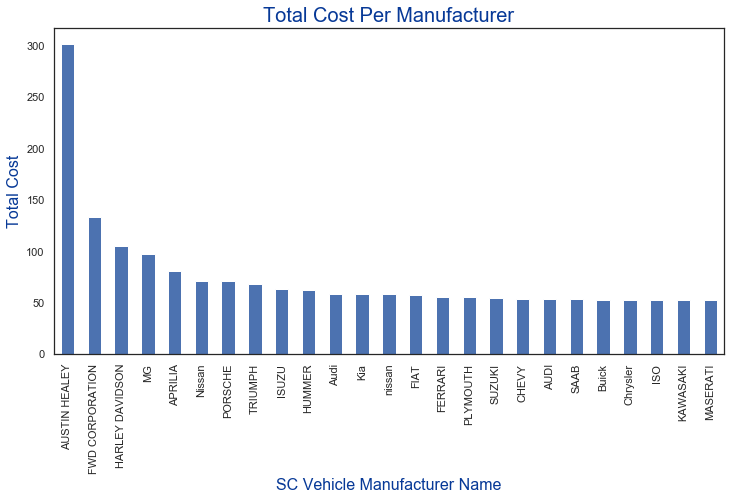

In [144]:
df.groupby('SC Vehicle Manufacturer Name')['Total Cost'].mean().nlargest(25).plot(kind = 'bar')

plt.ylabel('Total Cost', fontsize = 16, color = '#073997')
plt.xlabel('SC Vehicle Manufacturer Name', fontsize = 16, color = '#073997')
plt.title('Total Cost Per Manufacturer', fontsize = 20, color = '#073997')
plt.savefig('Vehicle_Model_Cost', bbox_inches = 'tight')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

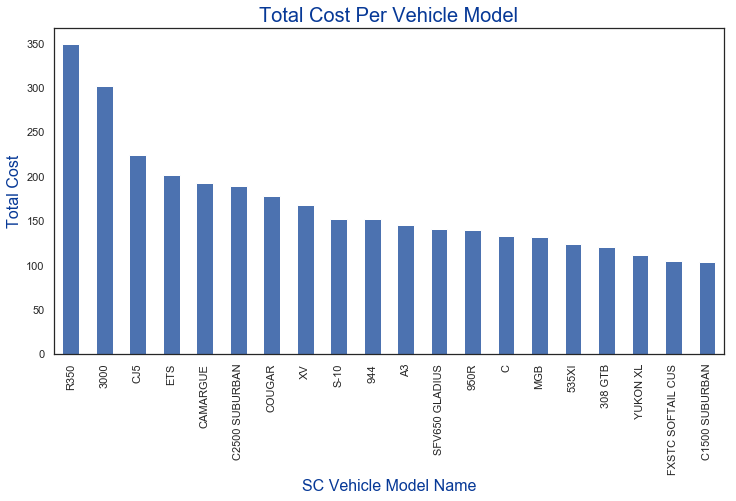

In [76]:
df.groupby('SC Vehicle Model Name')['Total Cost'].mean().nlargest(20).plot(kind = 'bar')
plt.ylabel('Total Cost', fontsize = 16, color = '#073997')
plt.xlabel('SC Vehicle Model Name', fontsize = 16, color = '#073997')
plt.title('Total Cost Per Vehicle Model', fontsize = 20, color = '#073997')
plt.savefig('Specific_model_cost', bbox_inches = 'tight')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

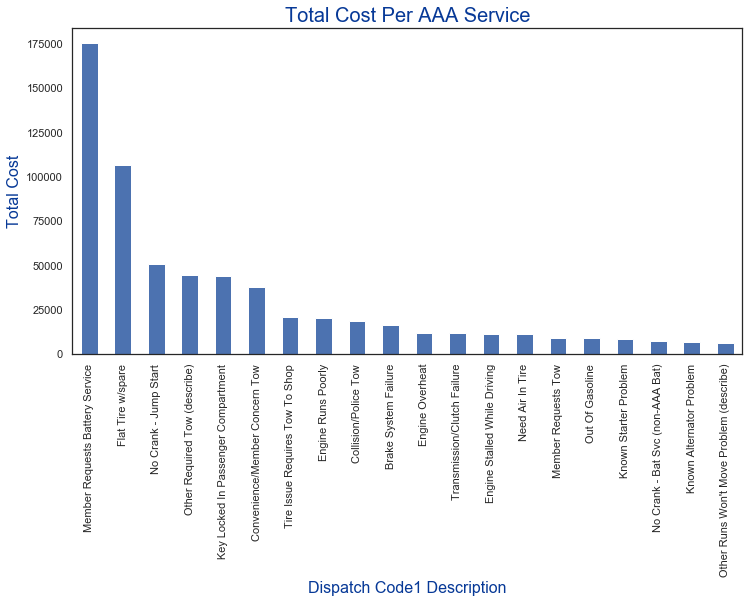

In [75]:
df.groupby('Dispatch Code1 Description')['Total Cost'].sum().nlargest(20).plot(kind = 'bar')
plt.ylabel('Total Cost', fontsize = 16, color = '#073997')
plt.xlabel('Dispatch Code1 Description', fontsize = 16, color = '#073997')
plt.title('Total Cost Per AAA Service', fontsize = 20, color = '#073997')
plt.savefig('Service_cost', bbox_inches = 'tight')
plt.xticks(rotation = 90)

### Explore Service Occurance Per Manufacturer type

In [85]:
from collections import Counter
A = list(df['SC Vehicle Manufacturer Name'])
Counter(A).most_common(25)

[(nan, 7359),
 ('TOYOTA', 2289),
 ('FORD', 1580),
 ('HONDA', 1494),
 ('CHEVROLET', 935),
 ('NISSAN', 780),
 ('HYUNDAI', 630),
 ('BUICK', 491),
 ('SUBARU', 480),
 ('JEEP', 468),
 ('DODGE', 391),
 ('CHRYSLER', 387),
 ('VOLKSWAGEN', 357),
 ('VOLVO', 340),
 ('LEXUS', 325),
 ('MERCURY', 278),
 ('MERCEDES-BENZ', 276),
 ('MAZDA', 264),
 ('KIA', 246),
 ('CADILLAC', 195),
 ('SATURN', 182),
 ('GMC', 179),
 ('BMW', 171),
 ('ACURA', 165),
 ('PONTIAC', 165)]

In [100]:
### Define Function to return list of most common values
def common():
    return lambda x: Counter(list(x)).most_common()

## Test if value is Nan and if so return next model
def testnun(x):
    if len(x) > 1 and type(x[0][0]) != str:
        return x[1][0]
    else:
        return x[0][0]

In [125]:
def return_common(x):
    com =  Counter(x).most_common()
    if len(com) > 1 and type(com[0][0]) != str:
        return com[1][0]
    else:
        return com[0][0]

In [126]:
testit = pd.DataFrame(df.groupby('Dispatch Code1 Description')['SC Vehicle Manufacturer Name'].agg(return_common))

In [127]:
testit.head()

,SC Vehicle Manufacturer Name
Dispatch Code1 Description,
Axle/Driveshaft/Suspension Failure,HONDA
Brake System Failure,FORD
Car Alarm Issue,TOYOTA
Collision/Police Tow,TOYOTA
Convenience/Member Concern Tow,FORD


In [128]:
def return_count(x):
    com =  Counter(x).most_common()
    if len(com) > 1 and type(com[0][0]) != str:
        return com[1][0]
    else:
        return com[0][1]

In [130]:
testit['count'] = df.groupby('Dispatch Code1 Description')['SC Vehicle Manufacturer Name'].agg(return_count)

In [131]:
testit.head()

,SC Vehicle Manufacturer Name,count
Dispatch Code1 Description,,
Axle/Driveshaft/Suspension Failure,HONDA,19
Brake System Failure,FORD,53
Car Alarm Issue,TOYOTA,5
Collision/Police Tow,TOYOTA,29
Convenience/Member Concern Tow,FORD,94


In [133]:
ford = testit[testit['SC Vehicle Manufacturer Name'] == 'FORD']

In [137]:
ford.reset_index(inplace = True)

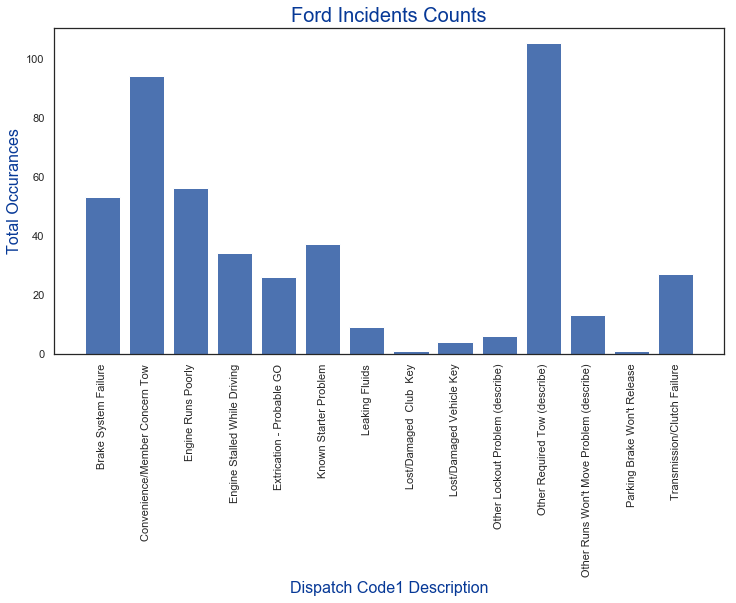

In [146]:
rcParams['figure.figsize'] = 12, 6

plt.ylabel('Total Occurances', fontsize = 16, color = '#073997')
plt.xlabel('Dispatch Code1 Description', fontsize = 16, color = '#073997')
plt.title('Ford Incidents Counts', fontsize = 20, color = '#073997')
plt.bar(ford['Dispatch Code1 Description'], ford['count'])
plt.xticks(rotation = 90)
plt.savefig('Ford_Incidents', bbox_inches = 'tight')

In [112]:
ford_test = pd.DataFrame(df.groupby('Dispatch Code1 Description')['SC Vehicle Manufacturer Name'].agg(lambda x: Counter(list(x)).most_common()))

In [113]:
ford_test.info

<bound method DataFrame.info of                                                                SC Vehicle Manufacturer Name
Dispatch Code1 Description                                                                 
Axle/Driveshaft/Suspension Failure        [(HONDA, 19), (FORD, 17), (CHEVROLET, 15), (TO...
Brake System Failure                      [(FORD, 53), (CHEVROLET, 29), (BUICK, 21), (TO...
Car Alarm Issue                           [(TOYOTA, 5), (OLDSMOBILE, 1), (HONDA, 1), (PL...
Collision/Police Tow                      [(TOYOTA, 29), (FORD, 17), (HONDA, 15), (NISSA...
Convenience/Member Concern Tow            [(FORD, 94), (CHEVROLET, 79), (TOYOTA, 63), (H...
Crank No Start                            [(TOYOTA, 7), (FORD, 3), (HONDA, 3), (SUBARU, ...
EV Out Of Charge Station Range                                             [(CHEVROLET, 1)]
Engine Overheat                           [(HONDA, 34), (TOYOTA, 23), (NISSAN, 18), (FOR...
Engine Runs Poorly                        [(FORD

In [31]:
df['Birth Date MMDDYYYY'].head()

0                    NaN
1    1922-02-05 00:00:00
2    1922-02-05 00:00:00
3    1922-02-05 00:00:00
4    1922-02-05 00:00:00
Name: Birth Date MMDDYYYY, dtype: object

In [32]:
df['DOB'] = pd.to_datetime(df['Birth Date MMDDYYYY'])

In [33]:
import datetime

In [34]:
now = datetime.datetime.now()

In [35]:
df['age'] = now.year - df['DOB'].dt.year

In [36]:
df.age.value_counts().nlargest(30)

73.0    665
74.0    569
71.0    566
72.0    518
70.0    481
39.0    480
78.0    471
76.0    464
69.0    457
68.0    456
75.0    454
77.0    396
79.0    394
67.0    387
80.0    374
83.0    354
87.0    350
85.0    342
92.0    337
66.0    335
84.0    334
89.0    333
81.0    315
91.0    309
88.0    309
90.0    306
82.0    302
93.0    283
94.0    276
86.0    269
Name: age, dtype: int64

In [37]:
#Fill missing age values with mean = 69.4
df.age.fillna(df.age.mean(), inplace = True)

In [38]:
df.age.isna().sum()

0

In [39]:
df.age.describe()

count    21344.000000
mean        69.462861
std         17.423438
min         18.000000
25%         64.000000
50%         70.000000
75%         81.000000
max        113.000000
Name: age, dtype: float64

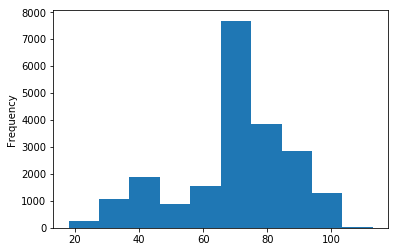

In [40]:
df.age.plot(kind = 'hist')

### Do Feature Engineering and Build Regressor

In [41]:
cost_df = cost_df.loc[:, ['Household Key', 'Total Cost', 'Dispatch Code1 Description']]

In [42]:
cost_dummied = pd.get_dummies(cost_df, columns = ['Dispatch Code1 Description'], drop_first = True)

In [43]:
cost_dummied.head()

,Household Key,Total Cost,Dispatch Code1 Description_Brake System Failure,Dispatch Code1 Description_Car Alarm Issue,Dispatch Code1 Description_Collision/Police Tow,Dispatch Code1 Description_Convenience/Member Concern Tow,Dispatch Code1 Description_Crank No Start,Dispatch Code1 Description_EV Out Of Charge Station Range,Dispatch Code1 Description_Engine Overheat,Dispatch Code1 Description_Engine Runs Poorly,...,Dispatch Code1 Description_Other Service (describe),Dispatch Code1 Description_Out Of Gasoline,Dispatch Code1 Description_Parking Brake Won't Release,Dispatch Code1 Description_Taxi/Shuttle Service,Dispatch Code1 Description_Tire Issue Requires Tow To Shop,Dispatch Code1 Description_Transmission/Clutch Failure,Dispatch Code1 Description_Undercar Component Dragging,Dispatch Code1 Description_Vehicle Fire,Dispatch Code1 Description_Vehicle Mis-Fueled,Dispatch Code1 Description_Windshield Damage
0,10462590.0,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4500791.0,32.5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4500791.0,30.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4500791.0,32.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4500791.0,30.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
cost_dummied.groupby('Household Key').sum().head()

,Total Cost,Dispatch Code1 Description_Brake System Failure,Dispatch Code1 Description_Car Alarm Issue,Dispatch Code1 Description_Collision/Police Tow,Dispatch Code1 Description_Convenience/Member Concern Tow,Dispatch Code1 Description_Crank No Start,Dispatch Code1 Description_EV Out Of Charge Station Range,Dispatch Code1 Description_Engine Overheat,Dispatch Code1 Description_Engine Runs Poorly,Dispatch Code1 Description_Engine Stalled While Driving,...,Dispatch Code1 Description_Other Service (describe),Dispatch Code1 Description_Out Of Gasoline,Dispatch Code1 Description_Parking Brake Won't Release,Dispatch Code1 Description_Taxi/Shuttle Service,Dispatch Code1 Description_Tire Issue Requires Tow To Shop,Dispatch Code1 Description_Transmission/Clutch Failure,Dispatch Code1 Description_Undercar Component Dragging,Dispatch Code1 Description_Vehicle Fire,Dispatch Code1 Description_Vehicle Mis-Fueled,Dispatch Code1 Description_Windshield Damage
Household Key,,,,,,,,,,,,,,,,,,,,,
875.0,1063.20,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,3,0,0,0,0
969.0,226.10,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3338.0,0.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8718.0,0.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11524.0,294.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
reg_df = cost_dummied.groupby('Household Key').sum()

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
X = reg_df.drop('Total Cost', axis = 1)

In [49]:
y = reg_df['Total Cost']

In [50]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
results_df = pd.DataFrame({'features': X.columns, 'coefs': lr.coef_})

In [52]:
results_df.sort_values('coefs',ascending = False)

,features,coefs
45,Dispatch Code1 Description_Taxi/Shuttle Service,104.945019
42,Dispatch Code1 Description_Other Service (desc...,99.412992
24,Dispatch Code1 Description_Leaking Fluids,92.498207
14,Dispatch Code1 Description_Home Lockout,88.806848
15,Dispatch Code1 Description_Hood/Door Won't Clo...,79.094361
6,Dispatch Code1 Description_Engine Overheat,78.201502
41,Dispatch Code1 Description_Other Runs Won't Mo...,74.815207
0,Dispatch Code1 Description_Brake System Failure,67.541332
47,Dispatch Code1 Description_Transmission/Clutch...,62.291478
22,Dispatch Code1 Description_Known Alternator Pr...,61.662554


### Decision Treee

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
tree = DecisionTreeRegressor(max_depth =4)

In [55]:
tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
tree.score(X, y)

0.7983645271243857

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [58]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.5472056282523676

In [59]:
tree_df = pd.DataFrame({'features': X.columns, 'coefs': tree.feature_importances_})

In [60]:
tree_df.sort_values('coefs',ascending = False)

,features,coefs
43,Dispatch Code1 Description_Out Of Gasoline,0.715089
29,Dispatch Code1 Description_Member Requests Bat...,0.135535
12,Dispatch Code1 Description_Flat Tire w/spare,0.067439
39,Dispatch Code1 Description_Other Required Tow ...,0.042033
3,Dispatch Code1 Description_Convenience/Member ...,0.039904
0,Dispatch Code1 Description_Brake System Failure,0.000000
30,Dispatch Code1 Description_Member Requests Tow,0.000000
31,Dispatch Code1 Description_Multiple Flat Tires,0.000000
32,Dispatch Code1 Description_Need Air In Tire,0.000000
33,Dispatch Code1 Description_No Crank - Bat Svc ...,0.000000
